
📘 Epoch 1/10


训练集: 损失=0.3580, 准确率=90.18% | 验证集: 损失=0.2135, 准确率=93.89%

📘 Epoch 2/10


训练集: 损失=0.0733, 准确率=98.04% | 验证集: 损失=0.0765, 准确率=97.70%

📘 Epoch 3/10


训练集: 损失=0.0505, 准确率=98.61% | 验证集: 损失=0.0590, 准确率=98.32%

📘 Epoch 4/10


训练集: 损失=0.0403, 准确率=98.86% | 验证集: 损失=0.0586, 准确率=98.22%

📘 Epoch 5/10


训练集: 损失=0.0338, 准确率=99.00% | 验证集: 损失=0.0398, 准确率=98.84%

📘 Epoch 6/10


训练集: 损失=0.0290, 准确率=99.18% | 验证集: 损失=0.0411, 准确率=98.69%

📘 Epoch 7/10


训练集: 损失=0.0272, 准确率=99.19% | 验证集: 损失=0.0330, 准确率=98.94%

📘 Epoch 8/10


训练集: 损失=0.0258, 准确率=99.26% | 验证集: 损失=0.0284, 准确率=99.14%

📘 Epoch 9/10


训练集: 损失=0.0223, 准确率=99.34% | 验证集: 损失=0.0651, 准确率=97.86%

📘 Epoch 10/10


训练集: 损失=0.0185, 准确率=99.48% | 验证集: 损失=0.0203, 准确率=99.34%


c:\Users\31392\miniconda3\envs\kaggle\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\31392\miniconda3\envs\kaggle\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\31392\miniconda3\envs\kaggle\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\31392\miniconda3\envs\kaggle\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\31392\miniconda3\envs\kaggle\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35757

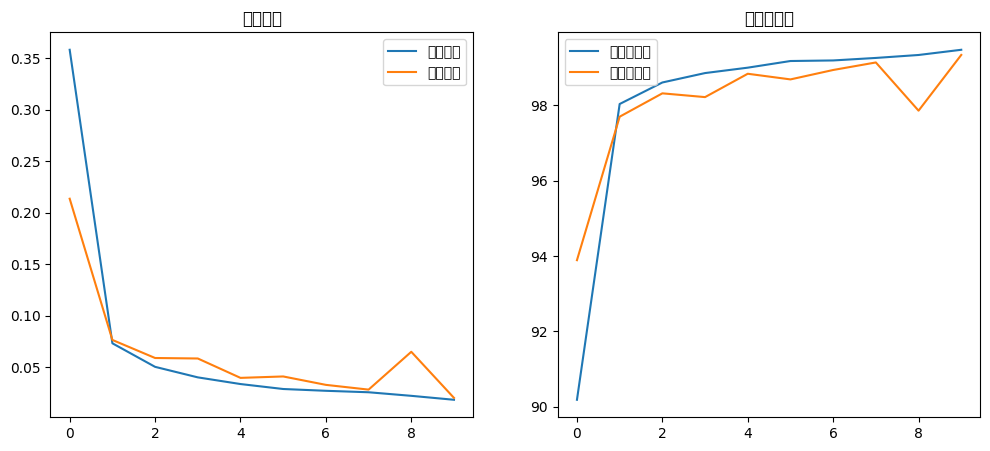

c:\Users\31392\miniconda3\envs\kaggle\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\31392\miniconda3\envs\kaggle\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\31392\miniconda3\envs\kaggle\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\31392\miniconda3\envs\kaggle\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\31392\miniconda3\envs\kaggle\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38469 (\N{CJK UN

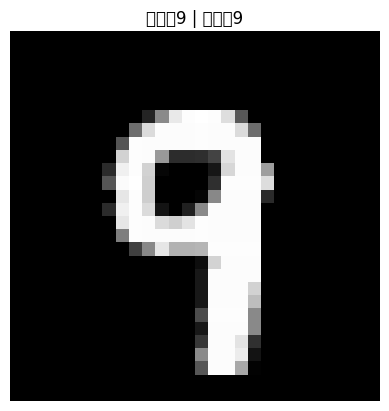

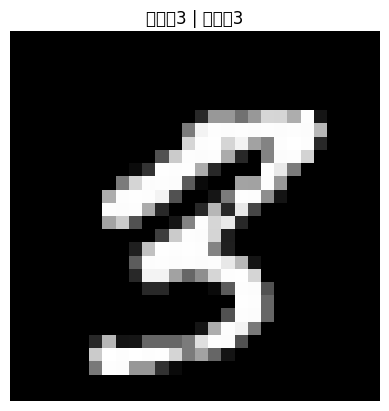

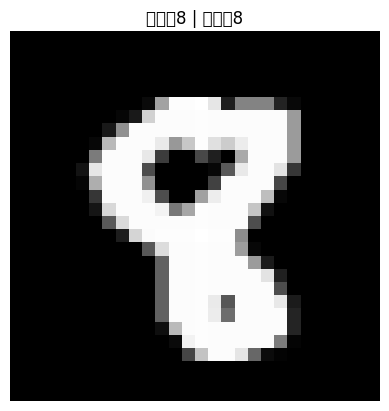

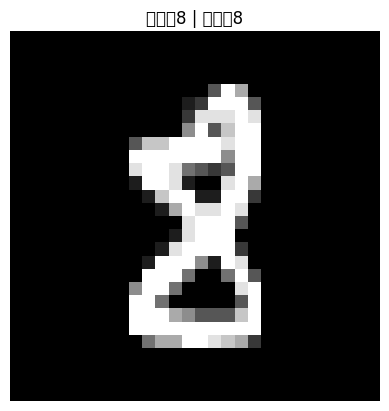

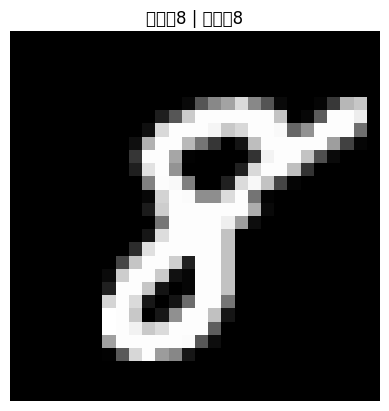

In [ ]:
# ============================================================
# 🧠 HRNet 简化版在 MNIST 数据集上的分类任务
# ============================================================

# -------------------------------
# 🔧 超参数设置
# -------------------------------
IS_TRAIN = True        # 是否重新训练模型（True=训练，False=只加载模型测试）
BN_MOMENTUM = 0.1      # 批归一化动量
NUM_EPOCHS = 10        # 训练轮数
BATCH_SIZE = 64        # 批次大小
LEARNING_RATE = 0.01   # 学习率

# -------------------------------
# 📦 导入库
# -------------------------------
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# ----------------------------
# 字体设置（Windows中文字体）
# ----------------------------
plt.rcParams["font.family"] = ["SimSun", "SimHei", "Microsoft YaHei"]
plt.rcParams['axes.unicode_minus'] = False

# -------------------------------
# 📑 数据加载（MNIST 原始大小 28x28）
# -------------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # 标准化
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(test_dataset,  batch_size=BATCH_SIZE, shuffle=False)

# -------------------------------
# 🧩 定义 HRNet 的基本模块
# -------------------------------
class BasicBlock(nn.Module):
    """HRNet 基础残差块（两层卷积）"""
    expansion = 1
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super().__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, 3, stride, 1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(planes, planes, 3, 1, 1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.downsample = downsample

    def forward(self, x):
        identity = x if self.downsample is None else self.downsample(x)
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += identity
        return self.relu(out)

class Bottleneck(nn.Module):
    """HRNet 的 Bottleneck 模块（三层结构）"""
    expansion = 4
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super().__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, 1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.conv2 = nn.Conv2d(planes, planes, 3, stride, 1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.conv3 = nn.Conv2d(planes, planes * self.expansion, 1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion, momentum=BN_MOMENTUM)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample

    def forward(self, x):
        identity = x if self.downsample is None else self.downsample(x)
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += identity
        return self.relu(out)

# -------------------------------
# 🧱 HRNet 主体（简化版）
# -------------------------------
class SimpleHRNet(nn.Module):
    """
    针对 MNIST 简化的 HRNet：
    输入：1x28x28
    输出：10 类数字
    """
    def __init__(self):
        super().__init__()
        # 初始层
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(32, momentum=BN_MOMENTUM)
        self.relu = nn.ReLU(inplace=True)

        # 第一阶段（Bottleneck）
        self.layer1 = self._make_layer(Bottleneck, 32, 32, 2)

        # 第二阶段（BasicBlock）
        self.layer2 = self._make_layer(BasicBlock, 128, 64, 2)

        # 全局平均池化 + 分类层
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(64, 10)

    def _make_layer(self, block, inplanes, planes, blocks, stride=1):
        """创建堆叠模块"""
        downsample = None
        if stride != 1 or inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(inplanes, planes * block.expansion, 1, stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion, momentum=BN_MOMENTUM)
            )
        layers = [block(inplanes, planes, stride, downsample)]
        for _ in range(1, blocks):
            layers.append(block(planes * block.expansion, planes))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# -------------------------------
# ⚙️ 训练与验证函数
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleHRNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)
criterion = nn.CrossEntropyLoss()

def train_one_epoch(model, loader, optimizer, criterion):
    model.train()
    total_loss, correct = 0, 0
    for data, target in tqdm(loader, desc="训练中", leave=False):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += output.argmax(1).eq(target).sum().item()
    acc = 100 * correct / len(loader.dataset)
    return total_loss / len(loader), acc

def eval_one_epoch(model, loader, criterion):
    model.eval()
    total_loss, correct = 0, 0
    with torch.no_grad():
        for data, target in tqdm(loader, desc="验证中", leave=False):
            data, target = data.to(device), target.to(device)
            output = model(data)
            total_loss += criterion(output, target).item()
            correct += output.argmax(1).eq(target).sum().item()
    acc = 100 * correct / len(loader.dataset)
    return total_loss / len(loader), acc

# -------------------------------
# 🚀 模型训练
# -------------------------------
if IS_TRAIN:
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    best_acc = 0

    for epoch in range(NUM_EPOCHS):
        print(f"\n📘 Epoch {epoch+1}/{NUM_EPOCHS}")
        tr_loss, tr_acc = train_one_epoch(model, train_loader, optimizer, criterion)
        val_loss, val_acc = eval_one_epoch(model, val_loader, criterion)

        train_losses.append(tr_loss); val_losses.append(val_loss)
        train_accs.append(tr_acc); val_accs.append(val_acc)

        print(f"训练集: 损失={tr_loss:.4f}, 准确率={tr_acc:.2f}% | 验证集: 损失={val_loss:.4f}, 准确率={val_acc:.2f}%")

        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), "best_hrnet_mnist.pth")

    # 📊 训练过程可视化
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(train_losses, label='训练损失')
    plt.plot(val_losses, label='验证损失')
    plt.legend(); plt.title('损失曲线')
    plt.subplot(1,2,2)
    plt.plot(train_accs, label='训练准确率')
    plt.plot(val_accs, label='验证准确率')
    plt.legend(); plt.title('准确率曲线')
    plt.show()

# -------------------------------
# 🧠 模型预测与结果可视化
# -------------------------------
model.load_state_dict(torch.load("best_hrnet_mnist.pth", map_location=device))
model.eval()

# 随机展示 5 张验证图片预测结果
for i in range(5):
    idx = random.randint(0, len(test_dataset)-1)
    img, label = test_dataset[idx]
    with torch.no_grad():
        pred = model(img.unsqueeze(0).to(device)).argmax(1).item()
    plt.imshow(img[0], cmap='gray')
    plt.title(f"预测：{pred} | 实际：{label}")
    plt.axis('off')
    plt.show()
